<h1>Importing labariers

In [407]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/india-census-2011/6. India Census 2011.csv


<H1>Reading Data

In [408]:
df = pd.read_csv("/kaggle/input/india-census-2011/6. India Census 2011.csv")

<h1>Data exploratory and analysis

In [409]:
df.head() #first 5 rows

,District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,...,1700,5600,66,39,74948,39709,21751,600759,178435,89679
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,...,1489,5559,47,6,66459,41367,27950,503223,160933,88978
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,75079,53265,21814,...,658,1092,88635,103,16265,8923,6197,70703,41515,21019
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,51873,39839,12034,...,604,1171,20126,28,16938,9826,3077,87532,35561,17488
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,161393,117677,43716,...,958,11188,83,10,46062,29517,13962,304979,109818,61334


<h4> 'District_code' col has unique values so we can use it as an index

In [410]:
df.set_index('District_code', inplace=True)
df

,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,Cultivator_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
District_code,,,,,,,,,,,,,,,,,,,,,
1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,34680,...,1700,5600,66,39,74948,39709,21751,600759,178435,89679
2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,55299,...,1489,5559,47,6,66459,41367,27950,503223,160933,88978
3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,75079,53265,21814,20869,...,658,1092,88635,103,16265,8923,6197,70703,41515,21019
4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,51873,39839,12034,8266,...,604,1171,20126,28,16938,9826,3077,87532,35561,17488
5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,161393,117677,43716,54264,...,958,11188,83,10,46062,29517,13962,304979,109818,61334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,PONDICHERRY,Mahe,41816,19143,22673,36470,11802,9093,2709,43,...,958,3,21,14,8773,5711,4475,19760,12543,9428
637,PONDICHERRY,Karaikal,200222,97809,102413,154916,68301,53139,15162,2372,...,18391,46,63,54,29456,15930,18998,102333,60089,37434
638,ANDAMAN AND NICOBAR ISLANDS,Nicobars,36842,20727,16115,25332,17125,12714,4411,322,...,26077,343,119,0,6325,3668,1300,18786,12088,5922


In [411]:
df.shape #(rows,cols)

(640, 24)

<h3>Checking For Duplicated Values

In [412]:
num_duplicated_rows = df.duplicated().sum()
print("Count of Duplicated rows is :",num_duplicated_rows)

Count of Duplicated rows is : 0


<h5>Data doesn't contain any duplicated rows

<h3>Checking For NULL Values

In [413]:
df.isnull().sum() 

State_name              0
District_name           0
Population              0
Male                    0
Female                  0
Literate                0
Workers                 0
Male_Workers            0
Female_Workers          0
Cultivator_Workers      0
Agricultural_Workers    0
Household_Workers       0
Hindus                  0
Muslims                 0
Christians              0
Sikhs                   0
Buddhists               0
Jains                   0
Secondary_Education     0
Higher_Education        0
Graduate_Education      0
Age_Group_0_29          0
Age_Group_30_49         0
Age_Group_50            0
dtype: int64

<h5>Data doesn't contain any NULL values

<h3>Checking for Dtypes

In [414]:
df.head(3) #first 3 rows

,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,Cultivator_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
District_code,,,,,,,,,,,,,,,,,,,,,
1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,34680,...,1700,5600,66,39,74948,39709,21751,600759,178435,89679
2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,55299,...,1489,5559,47,6,66459,41367,27950,503223,160933,88978
3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,75079,53265,21814,20869,...,658,1092,88635,103,16265,8923,6197,70703,41515,21019


In [415]:
df.dtypes

State_name              object
District_name           object
Population               int64
Male                     int64
Female                   int64
Literate                 int64
Workers                  int64
Male_Workers             int64
Female_Workers           int64
Cultivator_Workers       int64
Agricultural_Workers     int64
Household_Workers        int64
Hindus                   int64
Muslims                  int64
Christians               int64
Sikhs                    int64
Buddhists                int64
Jains                    int64
Secondary_Education      int64
Higher_Education         int64
Graduate_Education       int64
Age_Group_0_29           int64
Age_Group_30_49          int64
Age_Group_50             int64
dtype: object

<h5>All Data Types are perfect

<H2>Questions

<h3>Show the records realeted with districts -'Raigarh','Hamirpur','Bilaspur'

In [416]:
df.columns

Index(['State_name', 'District_name', 'Population', 'Male', 'Female',
       'Literate', 'Workers', 'Male_Workers', 'Female_Workers',
       'Cultivator_Workers', 'Agricultural_Workers', 'Household_Workers',
       'Hindus', 'Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains',
       'Secondary_Education', 'Higher_Education', 'Graduate_Education',
       'Age_Group_0_29', 'Age_Group_30_49', 'Age_Group_50'],
      dtype='object')

In [417]:
df['District_name'].value_counts()

District_name
Raigarh          2
Hamirpur         2
Aurangabad       2
Bijapur          2
Bilaspur         2
                ..
Muzaffarpur      1
Gopalganj        1
Siwan            1
Saran            1
South Andaman    1
Name: count, Length: 634, dtype: int64

In [418]:
df['District_name'].isin({'Raigarh','Hamirpur','Bilaspur'})

District_code
1      False
2      False
3      False
4      False
5      False
       ...  
636    False
637    False
638    False
639    False
640    False
Name: District_name, Length: 640, dtype: bool

In [419]:
df[df['District_name'].isin({'Raigarh','Hamirpur','Bilaspur'})]

,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,Cultivator_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
District_code,,,,,,,,,,,,,,,,,,,,,
28,HIMACHAL PRADESH,Hamirpur,454768,217070,237698,358091,241931,118724,123207,147103,...,243,591,95,293,91184,64363,35620,224044,123941,106641
30,HIMACHAL PRADESH,Bilaspur,381956,192764,189192,287620,205871,111543,94328,127169,...,236,2387,113,10,64730,45695,25474,193671,107367,80497
168,UTTAR PRADESH,Hamirpur,1104285,593537,510748,653299,443655,308527,135128,130314,...,814,196,74,41,103334,59914,59612,660774,260368,181109
403,CHHATTISGARH,Raigarh,1493984,750278,743706,951639,690167,429211,260956,208313,...,47653,2117,781,409,130700,93340,66358,841958,398257,253488
406,CHHATTISGARH,Bilaspur,2663629,1351574,1312055,1596560,1203197,715467,487730,276691,...,20745,6373,2979,2357,189296,152838,134637,1625484,655032,380114
520,MAHARASHTRA,Raigarh,2634200,1344345,1289855,1939994,1072969,753843,319126,206975,...,17452,7477,121791,12260,441072,221410,204507,1414154,748339,462741


<h3>Total no of Population

In [420]:
df.head(3)

,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,Cultivator_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
District_code,,,,,,,,,,,,,,,,,,,,,
1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,34680,...,1700,5600,66,39,74948,39709,21751,600759,178435,89679
2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,55299,...,1489,5559,47,6,66459,41367,27950,503223,160933,88978
3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,75079,53265,21814,20869,...,658,1092,88635,103,16265,8923,6197,70703,41515,21019


In [421]:
print("Total no of population is : ",df['Population'].sum())

Total no of population is :  1210854977


<h3>Total no of Population with different religions

In [422]:
df.columns

Index(['State_name', 'District_name', 'Population', 'Male', 'Female',
       'Literate', 'Workers', 'Male_Workers', 'Female_Workers',
       'Cultivator_Workers', 'Agricultural_Workers', 'Household_Workers',
       'Hindus', 'Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains',
       'Secondary_Education', 'Higher_Education', 'Graduate_Education',
       'Age_Group_0_29', 'Age_Group_30_49', 'Age_Group_50'],
      dtype='object')

In [423]:
df['State_name'].unique()

array(['JAMMU AND KASHMIR', 'HIMACHAL PRADESH', 'PUNJAB', 'CHANDIGARH',
       'UTTARAKHAND', 'HARYANA', 'NCT OF DELHI', 'RAJASTHAN',
       'UTTAR PRADESH', 'BIHAR', 'SIKKIM', 'ARUNACHAL PRADESH',
       'NAGALAND', 'MANIPUR', 'MIZORAM', 'TRIPURA', 'MEGHALAYA', 'ASSAM',
       'WEST BENGAL', 'JHARKHAND', 'ORISSA', 'CHHATTISGARH',
       'MADHYA PRADESH', 'GUJARAT', 'DAMAN AND DIU',
       'DADRA AND NAGAR HAVELI', 'MAHARASHTRA', 'ANDHRA PRADESH',
       'KARNATAKA', 'GOA', 'LAKSHADWEEP', 'KERALA', 'TAMIL NADU',
       'PONDICHERRY', 'ANDAMAN AND NICOBAR ISLANDS'], dtype=object)

In [424]:
res=df.groupby('State_name')['Population'].sum().sort_values(ascending=False)
res

State_name
UTTAR PRADESH                  199812341
MAHARASHTRA                    112374333
BIHAR                          104099452
WEST BENGAL                     91276115
ANDHRA PRADESH                  84580777
MADHYA PRADESH                  72626809
TAMIL NADU                      72147030
RAJASTHAN                       68548437
KARNATAKA                       61095297
GUJARAT                         60439692
ORISSA                          41974218
KERALA                          33406061
JHARKHAND                       32988134
ASSAM                           31205576
PUNJAB                          27743338
CHHATTISGARH                    25545198
HARYANA                         25351462
NCT OF DELHI                    16787941
JAMMU AND KASHMIR               12541302
UTTARAKHAND                     10086292
HIMACHAL PRADESH                 6864602
TRIPURA                          3673917
MEGHALAYA                        2966889
MANIPUR                          2855794
NAGAL

In [425]:
res.head(1) #max popluation with state name

State_name
UTTAR PRADESH    199812341
Name: Population, dtype: int64

In [426]:
res.tail(1) #min popluation with state name

State_name
LAKSHADWEEP    64473
Name: Population, dtype: int64

In [427]:
print("Min population is :",df.groupby('State_name')['Population'].sum().sort_values(ascending=False)[-1])
#df.groupby('State_name')['Population'].sum().min() #another way
#res.tail(1)[0]

Min population is : 64473


<h3> Age groups for different religions

In [428]:
df.columns

Index(['State_name', 'District_name', 'Population', 'Male', 'Female',
       'Literate', 'Workers', 'Male_Workers', 'Female_Workers',
       'Cultivator_Workers', 'Agricultural_Workers', 'Household_Workers',
       'Hindus', 'Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains',
       'Secondary_Education', 'Higher_Education', 'Graduate_Education',
       'Age_Group_0_29', 'Age_Group_30_49', 'Age_Group_50'],
      dtype='object')

In [429]:
df.groupby('State_name')[['Age_Group_0_29','Age_Group_30_49','Age_Group_50']].sum().sort_values(by='Age_Group_0_29', ascending=False)

,Age_Group_0_29,Age_Group_30_49,Age_Group_50
State_name,,,
UTTAR PRADESH,126507123,44192083,27491073
BIHAR,66930323,22949064,13816563
MAHARASHTRA,61782561,30272010,19912066
WEST BENGAL,50551737,25343015,15268912
ANDHRA PRADESH,45815669,23148452,14845225
MADHYA PRADESH,44264116,17814066,10465765
RAJASTHAN,42814434,15938006,9526395
TAMIL NADU,36336584,21429281,14314360
GUJARAT,34370917,16291242,9538689


<h4> Getting min value for each group

In [430]:
min_values=df.groupby('State_name')[['Age_Group_0_29','Age_Group_30_49','Age_Group_50']].sum().min() 
min_values

Age_Group_0_29     33877
Age_Group_30_49    19244
Age_Group_50       11237
dtype: int64

<h4> Getting max value for each group

In [431]:
max_values=df.groupby('State_name')[['Age_Group_0_29','Age_Group_30_49','Age_Group_50']].sum().max()
max_values

Age_Group_0_29     126507123
Age_Group_30_49     44192083
Age_Group_50        27491073
dtype: int64

In [432]:
df.columns

Index(['State_name', 'District_name', 'Population', 'Male', 'Female',
       'Literate', 'Workers', 'Male_Workers', 'Female_Workers',
       'Cultivator_Workers', 'Agricultural_Workers', 'Household_Workers',
       'Hindus', 'Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains',
       'Secondary_Education', 'Higher_Education', 'Graduate_Education',
       'Age_Group_0_29', 'Age_Group_30_49', 'Age_Group_50'],
      dtype='object')

<h3>how many male workers were there in maharashtra state?

In [433]:
df.head(2)

,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,Cultivator_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
District_code,,,,,,,,,,,,,,,,,,,,,
1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,34680,...,1700,5600,66,39,74948,39709,21751,600759,178435,89679
2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,55299,...,1489,5559,47,6,66459,41367,27950,503223,160933,88978


In [434]:
df['State_name'].unique()

array(['JAMMU AND KASHMIR', 'HIMACHAL PRADESH', 'PUNJAB', 'CHANDIGARH',
       'UTTARAKHAND', 'HARYANA', 'NCT OF DELHI', 'RAJASTHAN',
       'UTTAR PRADESH', 'BIHAR', 'SIKKIM', 'ARUNACHAL PRADESH',
       'NAGALAND', 'MANIPUR', 'MIZORAM', 'TRIPURA', 'MEGHALAYA', 'ASSAM',
       'WEST BENGAL', 'JHARKHAND', 'ORISSA', 'CHHATTISGARH',
       'MADHYA PRADESH', 'GUJARAT', 'DAMAN AND DIU',
       'DADRA AND NAGAR HAVELI', 'MAHARASHTRA', 'ANDHRA PRADESH',
       'KARNATAKA', 'GOA', 'LAKSHADWEEP', 'KERALA', 'TAMIL NADU',
       'PONDICHERRY', 'ANDAMAN AND NICOBAR ISLANDS'], dtype=object)

In [435]:
df['State_name']=='MAHARASHTRA'

District_code
1      False
2      False
3      False
4      False
5      False
       ...  
636    False
637    False
638    False
639    False
640    False
Name: State_name, Length: 640, dtype: bool

In [436]:
df[df['State_name']=='MAHARASHTRA']

,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,Cultivator_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
District_code,,,,,,,,,,,,,,,,,,,,,
497,MAHARASHTRA,Nandurbar,1648295,833170,815125,906509,792065,442898,349167,211672,...,8467,685,4969,6191,160961,113019,58461,1011352,390419,241534
498,MAHARASHTRA,Dhule,2050862,1054031,996831,1293916,936370,570448,365922,239139,...,3653,1422,13405,12818,290656,182739,114931,1167569,513908,350747
499,MAHARASHTRA,Jalgaon,4229917,2197365,2032552,2891882,1863571,1186472,677099,384359,...,7091,3091,143865,27404,627198,375643,229987,2352671,1080237,763529
500,MAHARASHTRA,Buldana,2586258,1337560,1248698,1879874,1219641,734024,485617,385447,...,3531,1668,364229,12242,406379,228266,113783,1467457,641840,473071
501,MAHARASHTRA,Akola,1813906,932334,881572,1411281,768154,520362,247792,129680,...,4483,1504,328033,10205,291391,205723,112574,998769,483200,327932
502,MAHARASHTRA,Washim,1197160,620302,576858,869917,569792,340353,229439,165598,...,1707,518,179330,8476,162762,116032,47865,682919,302425,210185
503,MAHARASHTRA,Amravati,2888445,1480768,1407677,2251875,1236322,837577,398745,198793,...,7223,2242,383891,11360,525116,346876,203273,1540590,783549,553265
504,MAHARASHTRA,Wardha,1300774,668385,632389,1019458,608235,392316,215919,132989,...,2696,2147,175417,5663,225208,158055,93772,659540,370227,270107
505,MAHARASHTRA,Nagpur,4653570,2384975,2268595,3673808,1868560,1334211,534349,206606,...,34667,20469,668050,24528,790443,542228,493236,2460820,1361821,818467


In [437]:
df[df['State_name']=='MAHARASHTRA']['Male_Workers'].sum()

32616875

In [438]:
print("Total no of Males working state name is 'MAHARASHTRA' is: ",df[df['State_name']=='MAHARASHTRA']['Male_Workers'].sum())

Total no of Males working state name is 'MAHARASHTRA' is:  32616875


In [439]:
df.columns

Index(['State_name', 'District_name', 'Population', 'Male', 'Female',
       'Literate', 'Workers', 'Male_Workers', 'Female_Workers',
       'Cultivator_Workers', 'Agricultural_Workers', 'Household_Workers',
       'Hindus', 'Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains',
       'Secondary_Education', 'Higher_Education', 'Graduate_Education',
       'Age_Group_0_29', 'Age_Group_30_49', 'Age_Group_50'],
      dtype='object')

In [440]:
df.groupby('State_name')[['Male','Male_Workers','Female','Female_Workers']].sum()

,Male,Male_Workers,Female,Female_Workers
State_name,,,,
ANDAMAN AND NICOBAR ISLANDS,202871,120889,177710,31646
ANDHRA PRADESH,42442146,24185595,42138631,15237311
ARUNACHAL PRADESH,713912,350273,669815,237384
ASSAM,15939443,8541560,15266133,3428130
BIHAR,54278157,25222189,49821295,9502798
CHANDIGARH,580663,328159,474787,75977
CHHATTISGARH,12832895,7133866,12712303,5046359
DADRA AND NAGAR HAVELI,193760,119293,149949,37868
DAMAN AND DIU,150301,107434,92946,13837


<h3>Add a new col that represent num of non-working Males

In [441]:
df['Not_working_Males']=df['Male']-df['Male_Workers']
df['Not_working_Males']

District_code
1      283291
2      235463
3       25706
4       37946
5      134222
        ...  
636     10050
637     44670
638      8013
639     24249
640     49720
Name: Not_working_Males, Length: 640, dtype: int64

In [442]:
df.shape #no of col+=1

(640, 25)

<h3>Add a new col that represent num of non-working Females

In [443]:
df['Not_working_Females']=df['Female']-df['Female_Workers']
df['Not_working_Males']

District_code
1      283291
2      235463
3       25706
4       37946
5      134222
        ...  
636     10050
637     44670
638      8013
639     24249
640     49720
Name: Not_working_Males, Length: 640, dtype: int64

In [444]:
df.shape #no of col+=1

(640, 26)

In [445]:
df.columns #Done

Index(['State_name', 'District_name', 'Population', 'Male', 'Female',
       'Literate', 'Workers', 'Male_Workers', 'Female_Workers',
       'Cultivator_Workers', 'Agricultural_Workers', 'Household_Workers',
       'Hindus', 'Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains',
       'Secondary_Education', 'Higher_Education', 'Graduate_Education',
       'Age_Group_0_29', 'Age_Group_30_49', 'Age_Group_50',
       'Not_working_Males', 'Not_working_Females'],
      dtype='object')

<h1>Visualizations 📊📈

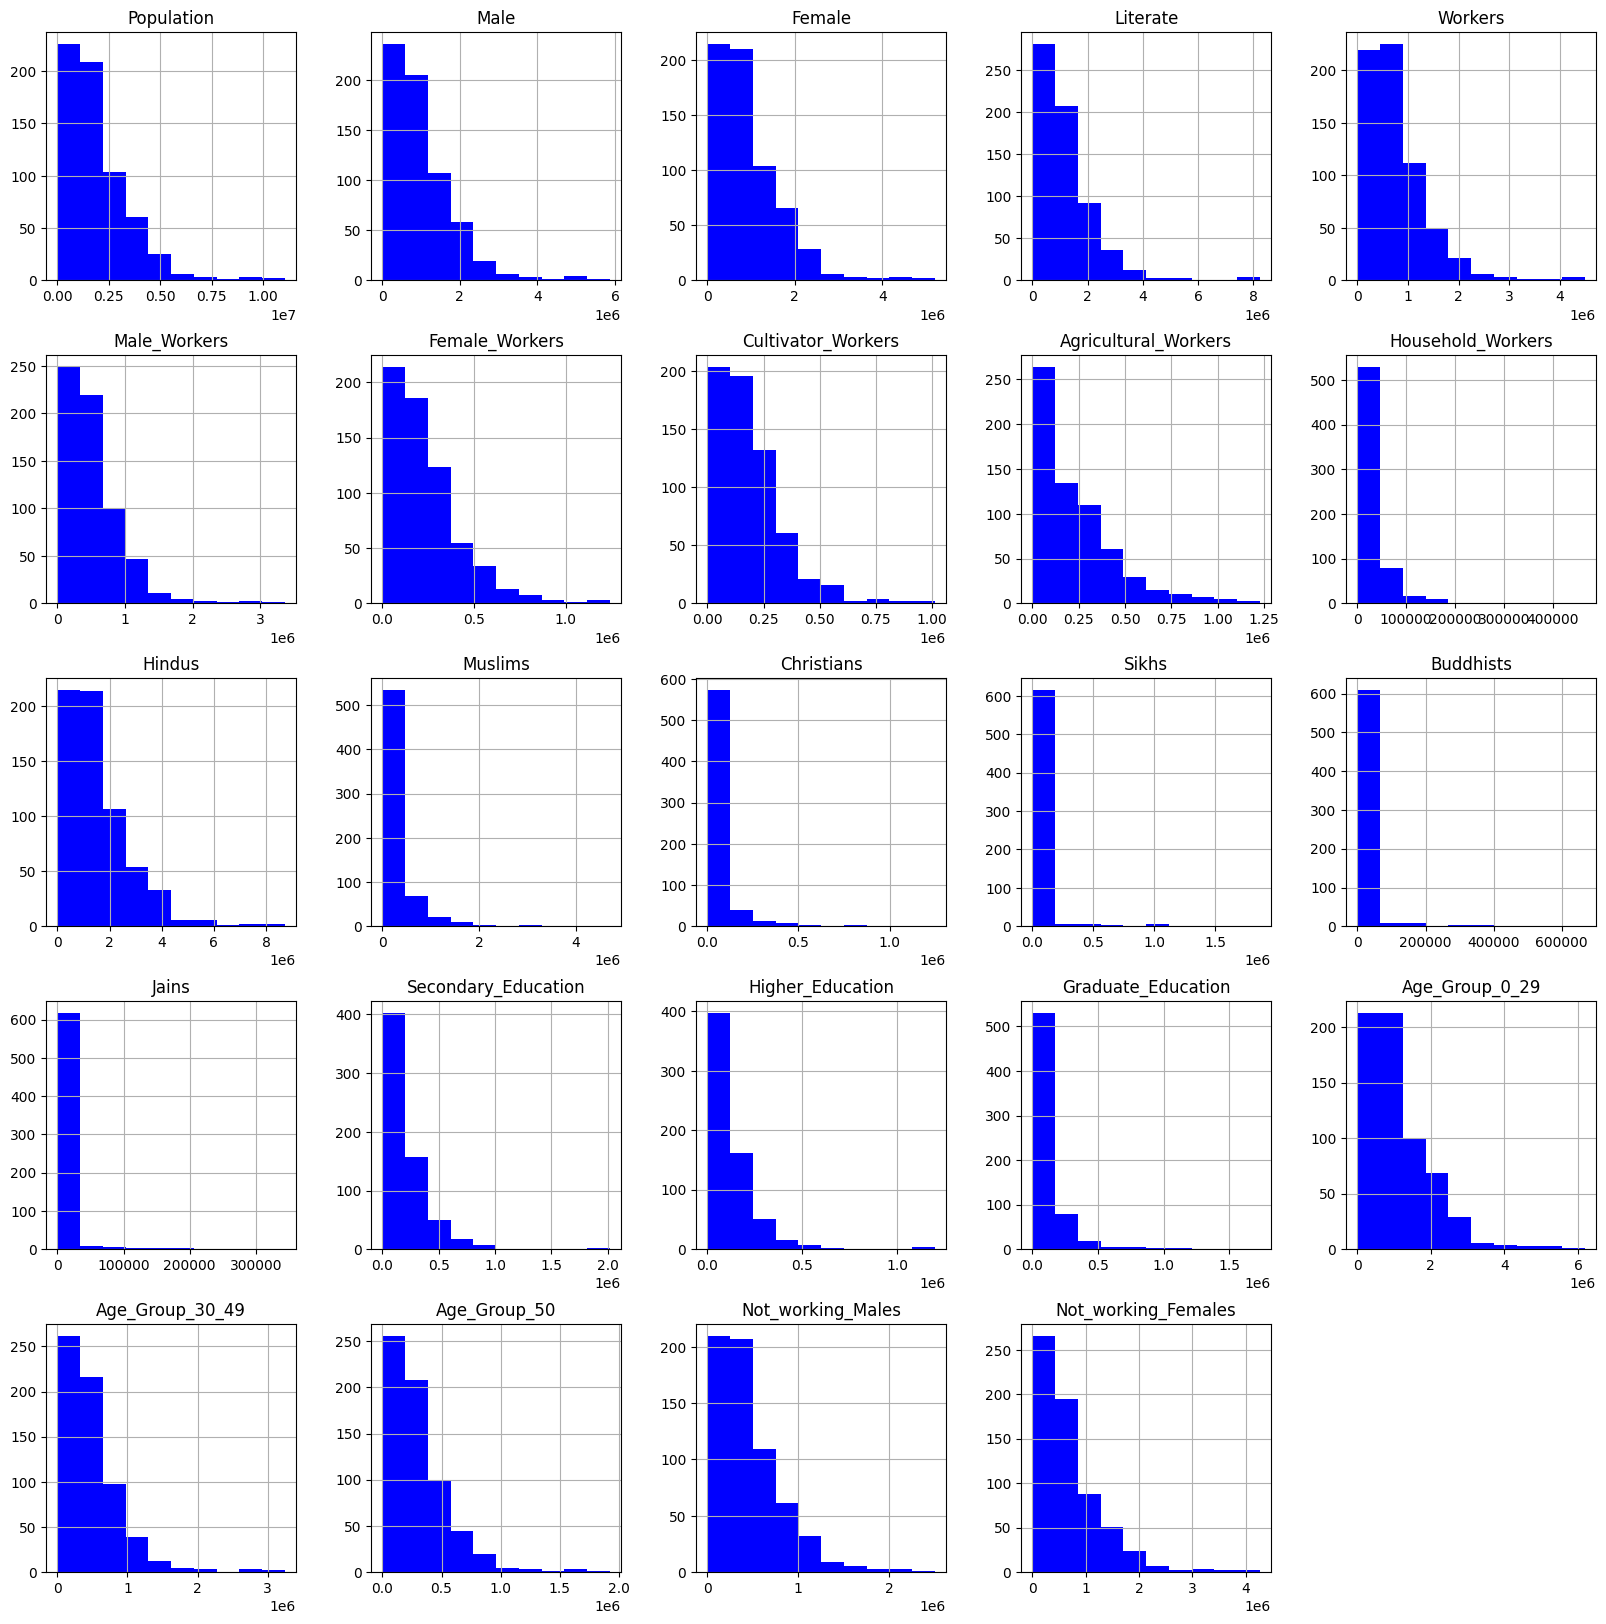

In [446]:
df.hist(figsize=(20,20),color='blue')  # Visualizations distribution columns that have a data type "Number "
plt.show()

In [447]:
df.dtypes

State_name              object
District_name           object
Population               int64
Male                     int64
Female                   int64
Literate                 int64
Workers                  int64
Male_Workers             int64
Female_Workers           int64
Cultivator_Workers       int64
Agricultural_Workers     int64
Household_Workers        int64
Hindus                   int64
Muslims                  int64
Christians               int64
Sikhs                    int64
Buddhists                int64
Jains                    int64
Secondary_Education      int64
Higher_Education         int64
Graduate_Education       int64
Age_Group_0_29           int64
Age_Group_30_49          int64
Age_Group_50             int64
Not_working_Males        int64
Not_working_Females      int64
dtype: object

In [448]:
df2=df.drop(['State_name','District_name'],axis=1) #heatmap works only on numerical values .
corr_matrix = df2.corr()

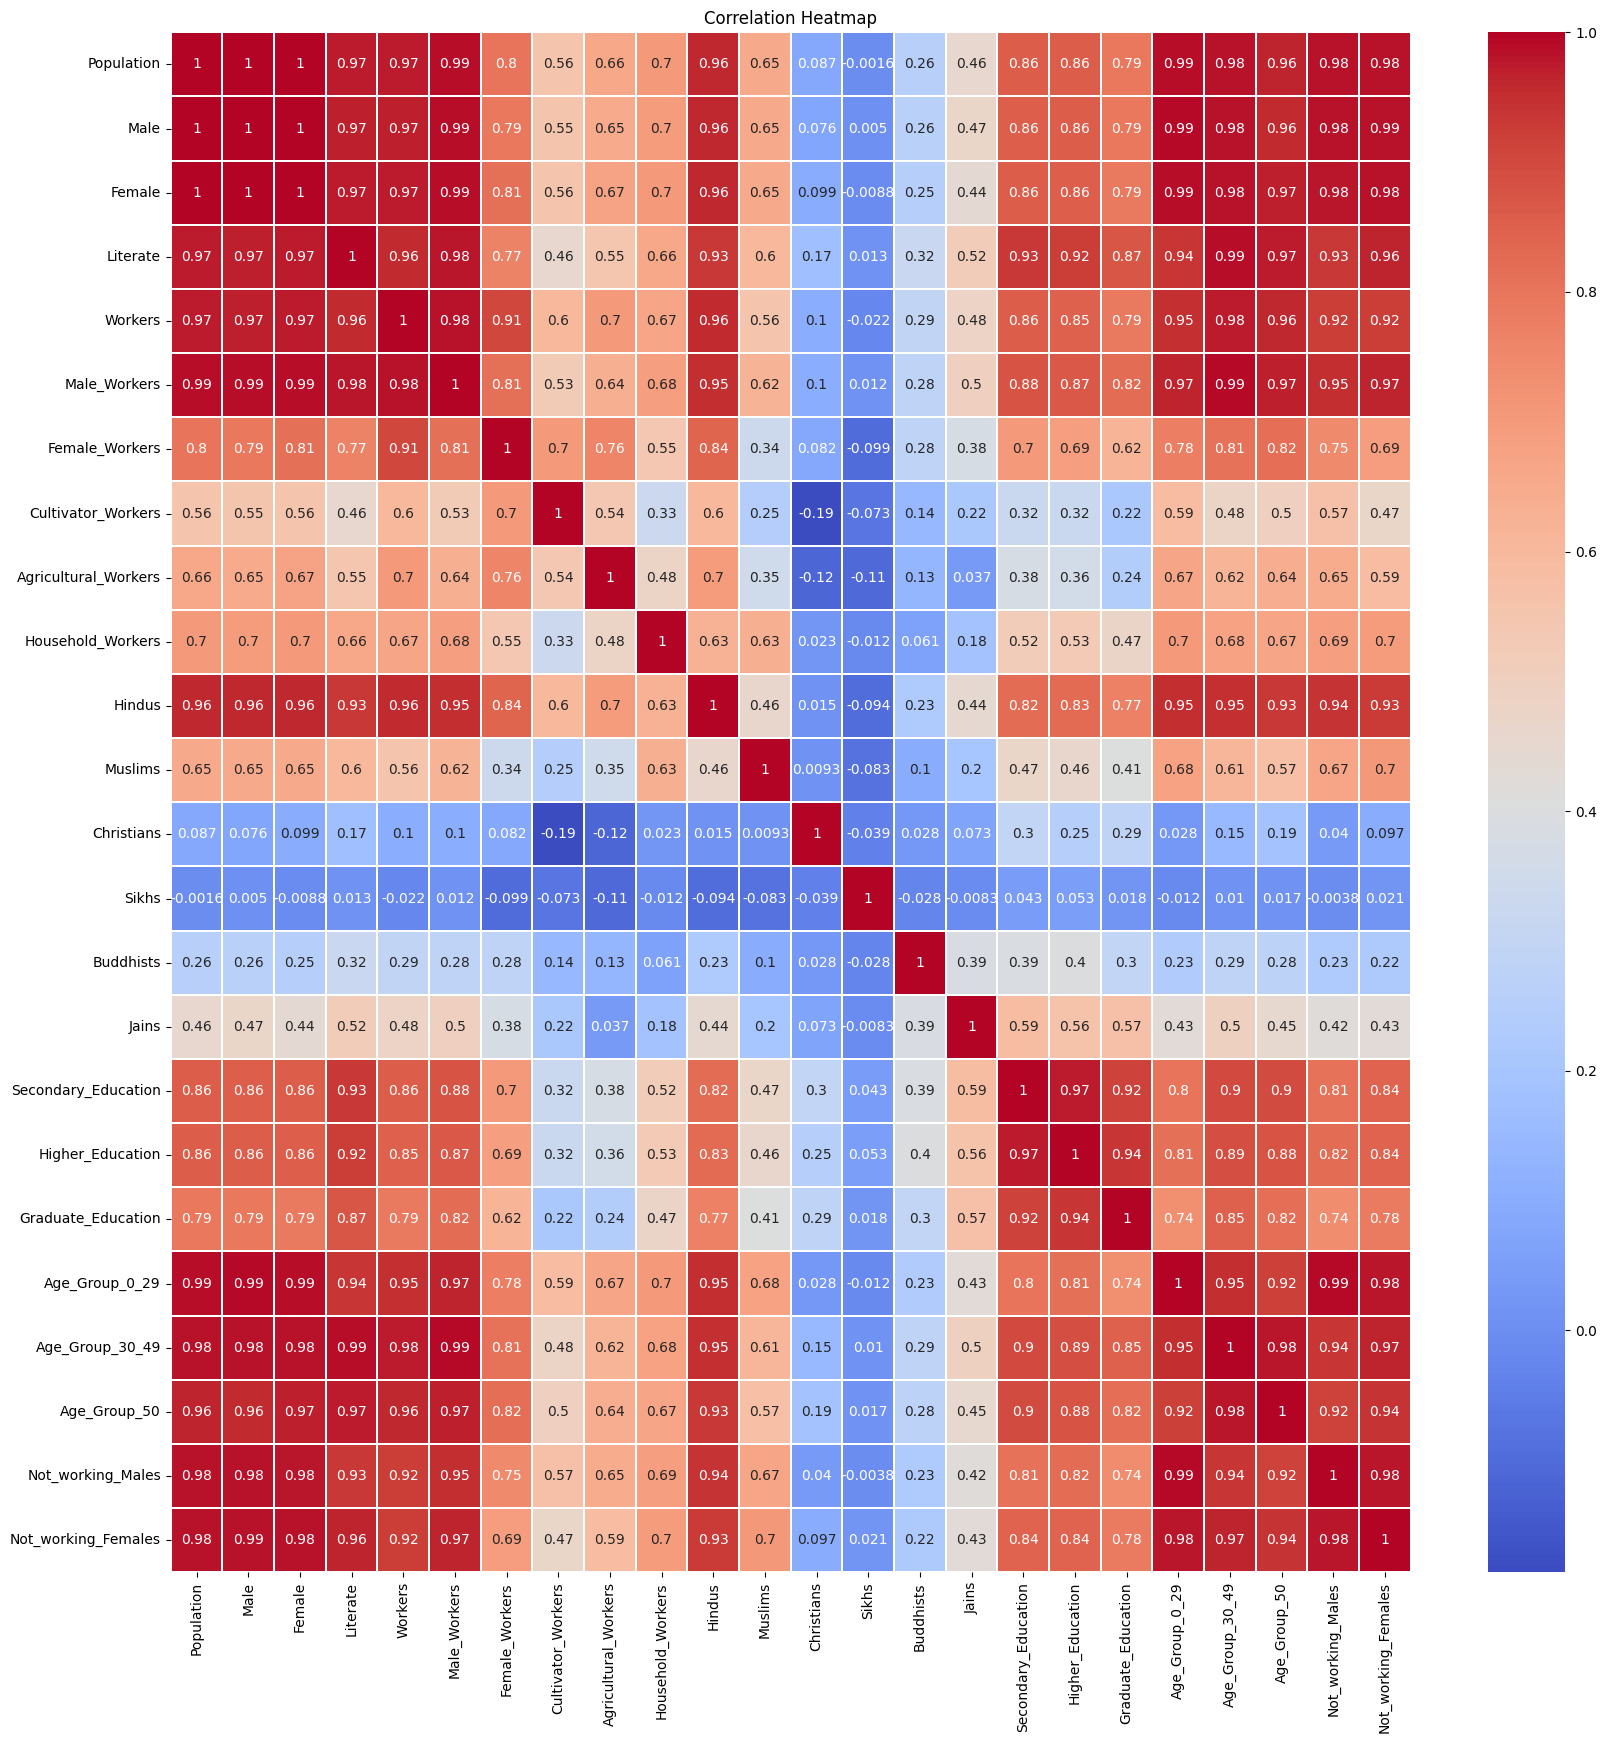

In [449]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.1) #visualizing relationships or patterns in a dataset
plt.title("Correlation Heatmap")
plt.show()

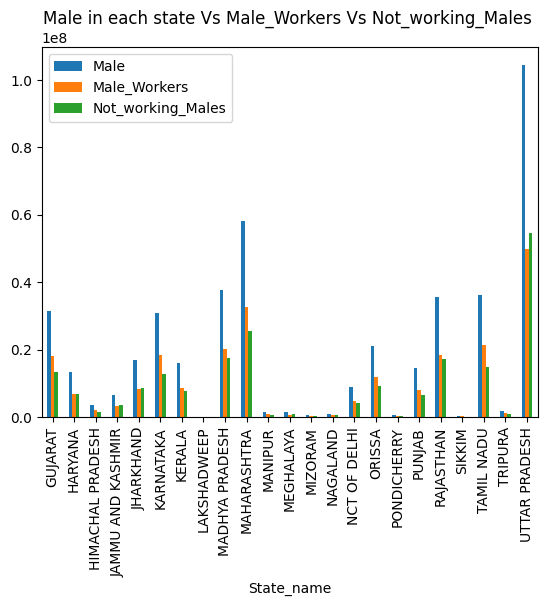

In [450]:
df.groupby('State_name')[['Male','Male_Workers','Not_working_Males']].sum()[10:-2].plot(kind='bar')#Male in each state Vs Male_Workers Vs Not_working_Males  for each state
plt.title("Male in each state Vs Male_Workers Vs Not_working_Males ")
plt.show()

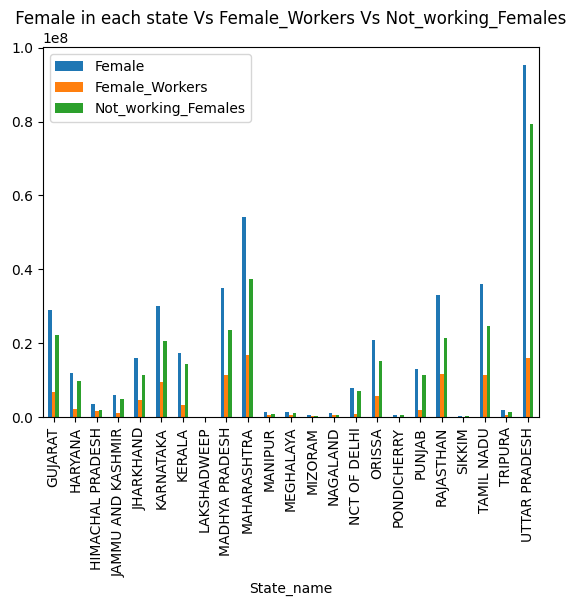

In [451]:
df.groupby('State_name')[['Female','Female_Workers','Not_working_Females']].sum()[10:-2].plot(kind='bar')#Female in each state Vs Female_Workers Vs Not_working_Femalesfor each state
plt.title(" Female in each state Vs Female_Workers Vs Not_working_Females ")
plt.show()

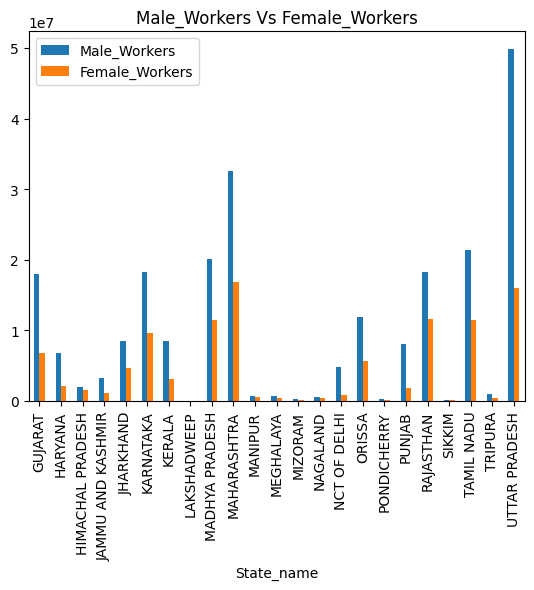

In [452]:
df.groupby('State_name')[['Male_Workers','Female_Workers']].sum()[10:-2].plot(kind='bar') #Male_Workers Vs Female_Workers for each state
plt.title("Male_Workers Vs Female_Workers")
plt.show()

/tmp/ipykernel_41/3567659352.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Population'], color='blue',fill=True, shade=True)


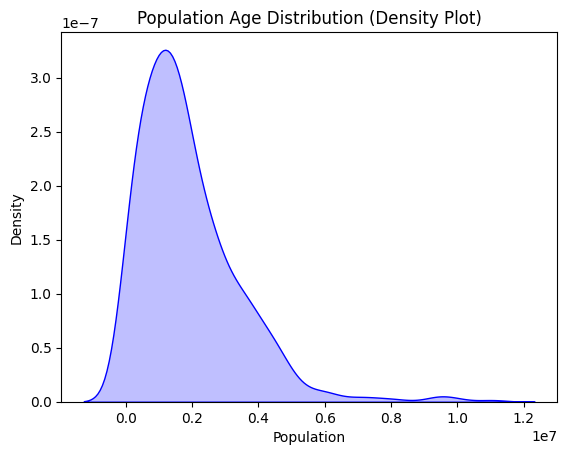

In [453]:
sns.kdeplot(df['Population'], color='blue',fill=True, shade=True)

plt.title('Population Age Distribution (Density Plot)')
plt.ylabel('Density')
plt.show()

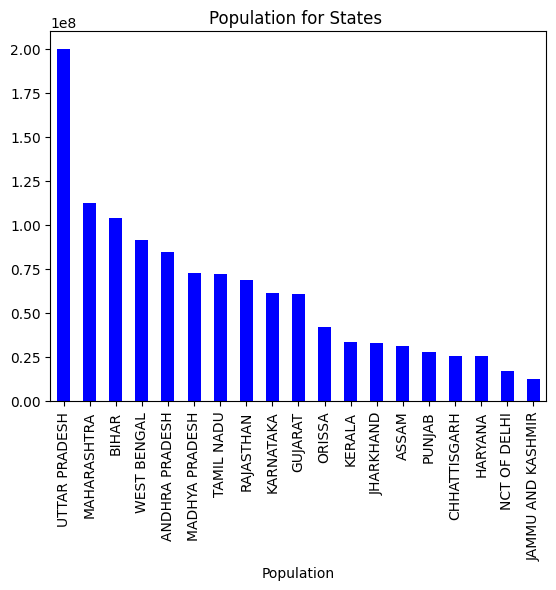

In [470]:
df.groupby('State_name')['Population'].sum().sort_values(ascending=False)[:19].plot(kind='bar',color='b')
plt.title("Population for States ")
plt.xlabel("Population")
plt.show()

<Axes: ylabel='Population'>

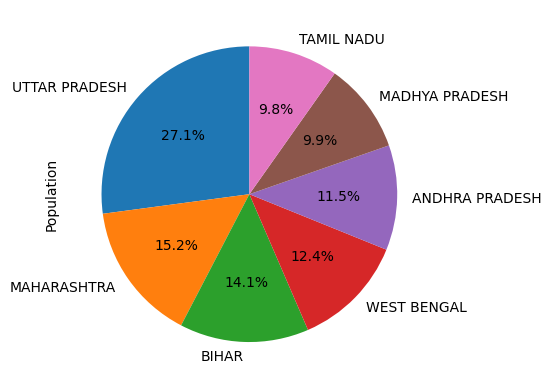

In [480]:
df.groupby('State_name')['Population'].sum().sort_values(ascending=False)[0:7].plot.pie(autopct='%1.1f%%', startangle=90) # bar plot for The 7 most populous states

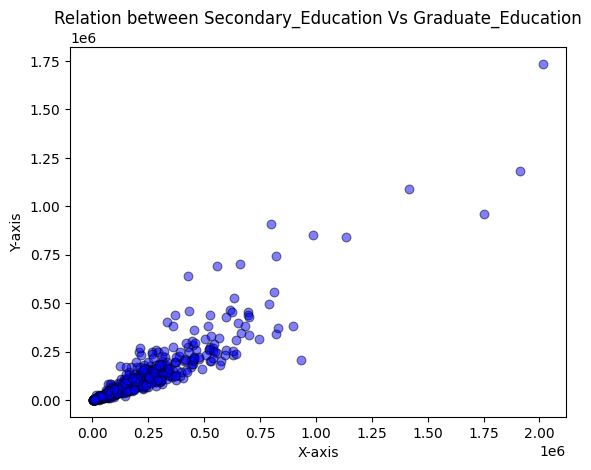

In [454]:
plt.scatter(df['Secondary_Education'], df['Graduate_Education'],s=40, c='blue', alpha=0.5, edgecolors='black', linewidths=.8)
plt.title("Relation between Secondary_Education Vs Graduate_Education")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

<h1>Wish You Luck
<h3>Esraa Meslam